# Week 6 - Prediction & Causal Inference

Name: Senling Shu

In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #For getting files
import zipfile #For managing zips
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import numpy as np #Math and matrices
import matplotlib.pyplot as plt #For graphics

# statsmodels is a popular Python statistics package
import statsmodels.api as sm
# Let's also import its graphics module
import statsmodels.graphics.api as smg
# And the mediation module
from statsmodels.stats.mediation import Mediation

# Pipelines to add text-based quantiative variables for regressions
from transformers import pipeline

# We have a lot of features, so let's set Pandas to show all of them.
pd.set_option('display.max_columns', None)

## <font color="red">*Exercise 1*</font>

<font color="red">Describe 2 separate predictions relevant to your project and associated texts, which involve predicting text that has not been observed based on patterns that have. Then, in a single, short paragraph, describe a research design through which you could use textual features and the tools of classification and regression to evaluate these predictions.

My final project is about MBTI personality types. One dataset I will collect is the descriptions about each of the 16 personality types from relevant website.
(1) One classification task that I can do for my final project is to use word counts to predict whether the descriptions indicate an E(extraversion) type or an I(introversion) type of personality with a logistic regression classifier. I can count the frequency of words such as "party", "outdoor", or "social" and then use them to predict one of the 2 types.
(2) Another task I can do is to simply classify these descriptions into several classes/clusters based on the textual feature - word2vec. This can also be done with a logistic regression classifier.        

## <font color="red">*Exercise 2*</font>

<font color="red">Propose a simple causal model in your data, or a different causal model in the annotated Internet Arguments Corpus (e.g., a different treatment, a different outcome), and test it using a linear or logistic regression model. If you are using social media data for your final project, we encourage you to classify or annotate a sample of that data (either compuationally or with human annotators) and examine the effect of texts on replies to that text (e.g., Reddit posts on Reddit comments, Tweets on Twitter replies, YouTube video transcripts on YouTube comments or ratings). You do not need to make a graph of the causal model, but please make it clear (e.g., "X affects Y, and C affects both X and Y.").
    
<font color="red">Also consider using the [ConvoKit datasets](https://convokit.cornell.edu/documentation/datasets.html)! Anytime there is conversation, there is an opportunity to explore the effects of early parts of the conversation on later parts. We will explore this further in Week 8 on Text Generation and Conversation.
    
<font color="red">***Stretch*** (not required): Propose a more robust identification strategy using either matching, difference in difference, regression discontinuity, or an instrumental variable. Each of these methods usually gives you a more precise identification of the causal effect than a unconditional regression. Scott Cunningham's [Causal Inference: The Mixtape](https://mixtape.scunning.com/) is a free textbook on these topics, and all have good YouTube video explanations.

I am trying to predict whether the respondent is questioning the original poster or is asserting their own ideas (i.e. question/assert). The factors that I think may play roles are agree/disagree, attack/insult, nice/nasty, and negotiate/attack. I would expect that if the respondent questions the original poster, she/he would show more disagreement, exihibit more attacks, have a nastier attitude, and be more likely to have an argument of their own.  

In [47]:
triples = triples.dropna()

In [100]:
triples['questioning-asserting_r2']

0       1.500000
1      -1.500000
3      -1.500000
4       3.250000
5       1.750000
          ...   
1341   -0.750000
1342    2.500000
1343    2.000000
1344   -0.333333
1345    3.250000
Name: questioning-asserting_r2, Length: 1125, dtype: float64

In [105]:
X_cols = ["nicenasty_r2", "negotiate-attack_r2", "attack_r2", "agree-disagree_r2"]
sm.add_constant(triples[X_cols])

,const,nicenasty_r2,negotiate-attack_r2,attack_r2,agree-disagree_r2
0,1.0,0.500000,3.500000,0.333333,0.600000
1,1.0,0.500000,2.000000,0.833333,0.600000
3,1.0,0.000000,1.500000,-1.333333,0.600000
4,1.0,1.166667,-1.750000,1.166667,0.428571
5,1.0,-1.600000,1.250000,-2.000000,0.200000
...,...,...,...,...,...
1341,1.0,-2.666667,1.500000,-3.166667,0.200000
1342,1.0,1.750000,-3.000000,0.750000,0.600000
1343,1.0,1.200000,-1.200000,2.200000,0.000000
1344,1.0,0.200000,-0.333333,0.200000,0.571429


In [51]:
y = triples['questioning-asserting_r2']
X_cols = ["nicenasty_r2", "negotiate-attack_r2", "attack_r2", "agree-disagree_r2"]
X = sm.add_constant(triples[X_cols])

lm2 = sm.OLS(y,X).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     questioning-asserting_r2   R-squared:                       0.104
Model:                                  OLS   Adj. R-squared:                  0.101
Method:                       Least Squares   F-statistic:                     32.50
Date:                      Thu, 24 Feb 2022   Prob (F-statistic):           1.16e-25
Time:                              02:27:55   Log-Likelihood:                -2506.2
No. Observations:                      1125   AIC:                             5022.
Df Residuals:                          1120   BIC:                             5047.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5749      0.148      3.891      0.000       0.285       0.865
nicenasty_r2           -0.1845      0.115     -1.606      0.108      -0.410       0.041
negotiate-attack_r2    -0.3299      0.031    -10.611      0.000      -0.391      -0.269
attack_r2               0.1423      0.112      1.275      0.202      -0.077       0.361
agree-disagree_r2       0.1094      0.288      0.380      0.704      -0.455       0.674
==============================================================================
Omnibus:                       24.420   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.686
Skew:                          -0.370   Prob(JB):                     2.64e-06
Kurtosis:                       2.974   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems that whether the respondent has an argument of their own is largely predictive.

## <font color="red">*Exercise 3*</font>

<font color="red">Propose a measure you could generate to fill in or improve upon the simple causal model you proposed above and how you would split the data (e.g., a % of your main data, a separate-but-informative dataset). You do not have to produce the measure.
    
<font color="red">***Stretch*** (not required): Produce the measure and integrate it into your statistical analysis. This could be a great approach for your final project!

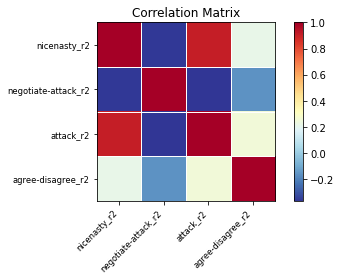

In [49]:
corr_matrix = np.corrcoef(triples[X_cols].T)
smg.plot_corr(corr_matrix, xnames=X_cols)
plt.show()

The correlation matrix shows that nicenasty_r2 and attack_r2 are highly correlated. One thing we could do is to combine the 2 variables into one single variable and look at its effect on questioning-asserting_r2. 

I think I would split the data with a test size = 0.3. 

## <font color="red">*Exercise 4*</font>

<font color="red">Propose a mediation model related to the simple causal model you proposed above (ideally on the dataset you're using for your final project). If you have measures for each variable in the model, run the analysis: You can just copy the "Mediation analysis" cell above and replace with your variables. If you do not have measures, do not run the analysis, but be clear as to the effect(s) you would like to estimate and the research design you would use to test them.

I think one mediation variable that affects the relationship of negotiate/attack and question/assert could be the token-based similarity between the original post and the respondent's post. The similarity is higher if the respondent simply attacking the original poster's argument since they need to recycle some ideas and words. In contrast, the similarity is lower if the respondent seem to have an arugment of their own. 

Model: negotiate/attack affects similarity score, and similarity score affects question/assert  

## <font color="red">*Exercise 5*</font>

<font color="red">Propose a confounder in your final project data that could be controlled for using the method of Pryzant et al. Generate an appropriate CSV file and run it on some vocabulary in your corpus. If you have no such confounder available for your final project, you can use `complaints.csv` with a new vocabulary or for different variables (e.g., `Sub-product`, `Company`) or you can further explore the interesting case of `mortgage`. Also keep in mind the [ConvoKit datasets](https://convokit.cornell.edu/documentation/datasets.html). In any case, be sure to interpret the results. What does the output of `causal_attribution.score_vocab()` mean in your context?

In [67]:
issue_num = complaints['Issue'].value_counts()
issue_num

Incorrect information on your report                                                591573
Problem with a credit reporting company's investigation into an existing problem    272744
Attempts to collect debt not owed                                                   129418
Loan modification,collection,foreclosure                                            112309
Incorrect information on credit report                                              102685
                                                                                     ...  
Lender damaged or destroyed vehicle                                                      8
Problem with an overdraft                                                                8
Lender sold the property                                                                 7
Property was damaged or destroyed property                                               6
Lender damaged or destroyed property                                                     3

In [82]:
%%time

importance_scores = causal_attribution.score_vocab(
    vocab=[
           # Words I expect to be associated with issue
           'incorrect','false','trouble','improper','threaten','fraud','struggle','problem',
           # Words I expect to be associated with product
           'loan','credit','service','help','card',
           # Words I expect to not be associated with either
           'bad','good','help','thank','why','husband','wife','family'
          ],
    csv='complaints.csv',
    delimiter=",",
    name_to_type={
        'Consumer complaint narrative': 'input',
        'Issue': 'control',
        'Product': 'predict',
    })

importance_scores['Product']['Student loan']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()


CPU times: user 29.3 s, sys: 983 ms, total: 30.3 s
Wall time: 30.3 s


In [90]:
importance_scores['Product']['Student loan']

[('UNK', 3.775609578813601),
 ('loan', 2.7002351862493015),
 ('struggle', 2.6042514985019807),
 ('husband', 1.4261361586832209),
 ('help', 1.1498336647782708),
 ('service', 1.067681186070331),
 ('credit', 0.783010692379321),
 ('problem', 0.7165505176853912),
 ('good', 0.5465693157893838),
 ('family', 0.3611221917090006),
 ('fraud', 0.34063777068513446),
 ('bad', 0.2930872785655083),
 ('improper', 0.2843291924764344),
 ('trouble', 0.20805750532463207),
 ('false', 0.19867423809409956),
 ('help', 0.043197528342716396),
 ('card', 0.002211583176176646),
 ('PAD', -0.025723703351104632),
 ('why', -0.08599096185935196),
 ('wife', -0.19302745893310203),
 ('thank', -0.19947658766068344),
 ('threaten', -0.21515930550231133),
 ('incorrect', -0.2237291243945947)]

When controlling for issues, the words that best explain the student loan product are "loan", "struggle", and "husband". Words (e.g. loan, help, and service) that fall into the product category, based on my definition in the causal_attribution.score_vocab(), are predictive of the output "student loan".  It seems that issue-related word "struggle" is also a good predictor of "student loan". And it is surprising that "husband" is placed so high on the rank. I expected it to be uncorrelated with either "Issue" or "Student loan".    

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(complaints["Product"])
complaints["Product"] = le.transform(complaints["Product"])

LabelEncoder()

In [89]:
issue_product = complaints.groupby('Issue').agg({'Product': 'sum'}).sort_values(by=['Product'],ascending=False)
pcts = issue_product.divide(issue_num,axis=0).sort_values(by=['Product'],ascending=False)
pcts

,Product
Problems at the end of the loan or lease,15.998394
Getting a loan or lease,15.981223
Getting a loan,15.000000
Can't repay my loan,15.000000
Repaying your loan,15.000000
...,...
"Account opening, closing, or management",0.000000
"Making/receiving payments, sending money",0.000000
Using a debit or ATM card,0.000000
Deposits and withdrawals,0.000000


Loan-related issues are closely associated with "student loan", confirming the prediction results. 